In [1]:
from DLFrameWork.forward import NetWork
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

y = 0. It's a non-cat picture.


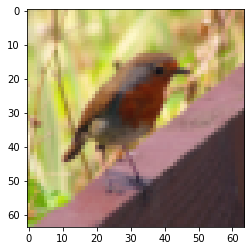

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
train_set_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_set_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T
# normalize 
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [24]:
    epochs = 5
    #2500

    costs = [] 
    print_cost = True
    net = NetWork((train_set_x.shape[0],7,1),('ReLU','Sigmoid'))   
    # (train_set_x.shape[0],7) (7,1) 
    for i in range(epochs):
        #  0.0075
            cost = net.fit(train_set_x,train_y,learning_rate = 0.001)
            # print('shape', cost.shape)
            if print_cost and i % 100 == 0:
                    print("Cost after iteration {}: {}".format(i, cost))
                    # print('itreration {}'.format(i+1))
                    print('-'*10)
            if print_cost and i % 100 == 0:
                    costs.append(cost)
            
    
    
    

Cost after iteration 0: 0.7263225621789393
----------


In [25]:
prob = net.Prediction(test_set_x,test_y,parameter=net.Parameters())
print(prob)


Accuracy: 0.62
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
  1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
  0. 1.]]


y = 1. It's a cat picture.


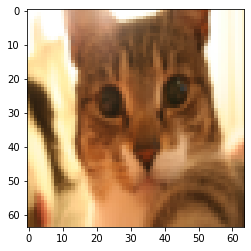

In [26]:
index = 11
plt.imshow(test_x_orig[index])
print ("y = " + str(test_y[0,index]) + ". It's a " + classes[test_y[0,index]].decode("utf-8") +  " picture.")

In [27]:
index = 11
my_image = test_x_orig[index] 
my_label_y = test_y[0,index] 
my_image = my_image.reshape(64*64*3,1)
my_image = my_image/255.
my_predicted_image = net.Prediction(my_image, my_label_y, net.Parameters())
print('My label is {}, prediction is {}'.format(my_label_y,np.squeeze(my_predicted_image)))
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

Accuracy: 1.0
My label is 1, prediction is 1.0
y = 1.0, your L-layer model predicts a "cat" picture.
